In [25]:
import pandas as pd
import pymysql
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import jieba
import jieba.analyse
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from imageio import imread
import re

from configs import USERNAME, PASSWORD, DBNAME

matplotlib.rcParams['font.sans-serif'] = ["simHei"]
matplotlib.rcParams['font.family'] = 'sans-serif'

In [26]:
sql = "SELECT * FROM company"
connect = pymysql.connect(host="127.0.0.1", user=USERNAME, password=PASSWORD, db=DBNAME)
company_data = pd.read_sql(sql, con=connect)
company_data

,company_id,company_full_name,company_short_name,company_logo,city,industry_field,company_features,finance_stage,company_size,interview_remark_num,position_num,update_time,process_rate,approve,company_combine_score,is_has_valid_position,other_label,match_score,modify_date
0,53,北京创锐文化传媒有限公司,聚美优品,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,北京,电商,聚集美丽，成人之美。,上市公司,2000人以上,147,15,2020-11-11,100,1,4.41723,1,"技能培训,节日礼物,季度奖金,岗位晋升,管理规范,帅哥多,五险一金,彩妆培训,股票期权,零食...",2.09427,2020-11-12 00:37:00
1,56,深圳市华宇讯科技有限公司,卖座网,i/image2/M01/76/3E/CgotOVtljaSAFEmjAACSJeCXFWE...,深圳,"移动互联网,电商",构建中国最大的品质生活服务平台,B轮,500-2000人,165,29,2020-11-11,90,1,4.57778,1,"技能培训,股票期权,五险一金,弹性工作,带薪年假,绩效奖金,定期体检,专项奖金,各类社团组织",2.25038,2020-11-12 00:37:05
2,62,北京字节跳动科技有限公司,字节跳动,i/image2/M01/79/0A/CgoB5ltr2A-AM5SFAADbT9jQCn8...,北京,文娱丨内容,你关心的，才是头条,C轮,2000人以上,189,10527,2020-11-11,9,1,4.43386,1,"扁平管理,弹性工作,大厨定制三餐,就近租房补贴,六险一金,股票期权,成长空间大,双线地铁沿线...",2.09427,2020-11-12 00:37:00
3,70,宝宝树（北京）信息技术有限公司,宝宝树,i/image/M00/01/A2/CgqKkVZyGeyAUPeJAAAIURCZrmM6...,北京,社交,中国最大最受关注的育儿网站社区,上市公司,500-2000人,70,59,2020-11-10,19,1,4.46190,1,"商业医疗保险,股票期权,带薪年假,扁平管理,管理规范,美女多,帅哥多,定期体检,五险一金,午餐补助",2.09427,2020-11-12 00:37:00
4,77,深圳爱宝宝网络科技有限公司,爱宝宝,image1/M00/00/01/Cgo8PFTUV_SAOGQmAACBh7F_xoE42...,苏州,移动互联网,“爱宝宝”是一个真实的幼儿园社区,B轮,50-150人,0,0,2013-07-18,0,1,0.00000,0,"社会保险,享受带薪年假,定期集体户外活动以及每月员工生日会,参加员工持股计划,扁平管理,公司...",2.09956,2020-11-12 00:38:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49725,122188365,徐州酷威文化传媒有限公司,酷威文化传媒,None,徐州,None,None,未融资,15-50人,0,1,2020-11-11,0,1,0.00000,1,None,4.47436,2020-11-12 00:38:12
49726,122188971,兰州新区五和快捷酒店有限公司,五和快捷酒店,None,兰州,None,None,未融资,150-500人,0,3,2020-11-11,0,0,0.00000,1,None,4.66440,2020-11-12 00:37:38
49727,122189405,兰州鑫讯达网络信息科技有限公司,鑫讯达,None,兰州,None,None,未融资,少于15人,0,1,2020-11-11,0,0,0.00000,1,None,4.66440,2020-11-12 00:37:38
49728,122189545,吉林省鑫阳科技有限公司,鑫阳科技,None,吉林,None,None,未融资,50-150人,0,1,2020-11-11,0,0,0.00000,1,None,5.26761,2020-11-12 00:37:59


In [27]:
company_data.dtypes

company_id                        int64
company_full_name                object
company_short_name               object
company_logo                     object
city                             object
industry_field                   object
company_features                 object
finance_stage                    object
company_size                     object
interview_remark_num              int64
position_num                      int64
update_time                      object
process_rate                      int64
approve                           int64
company_combine_score           float64
is_has_valid_position             int64
other_label                      object
match_score                     float64
modify_date              datetime64[ns]
dtype: object

In [28]:
company_data["update_time"] = pd.to_datetime(company_data["update_time"], format='%Y-%m-%d')
company_data.dtypes

company_id                        int64
company_full_name                object
company_short_name               object
company_logo                     object
city                             object
industry_field                   object
company_features                 object
finance_stage                    object
company_size                     object
interview_remark_num              int64
position_num                      int64
update_time              datetime64[ns]
process_rate                      int64
approve                           int64
company_combine_score           float64
is_has_valid_position             int64
other_label                      object
match_score                     float64
modify_date              datetime64[ns]
dtype: object

In [29]:
sql = "SELECT * FROM jobs"
job_data = pd.read_sql(sql, connect)
job_data

,company_id,position_id,job_nature,finance_stage,company_name,company_full_name,company_size,industry_field,position_name,city,create_time,salary,work_year,education,position_advantage,company_label_list,user_id,company_logo,district
0,53,1222794,全职,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,中级/高级DBA,成都,2020-11-13,16k-30k,3-5年,本科,周末双休、五险一金、午餐补贴、带薪休假,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
1,53,6206772,全职,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,PHP开发工程师,成都,2020-11-13,15k-25k,5-10年,本科,"五险一金,绩效奖金,餐饮补贴，带薪年假","技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
2,53,5943786,全职,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,IT工程师,成都,2020-11-13,5k-8k,1-3年,本科,"全额五险一金,餐饮补贴,周末双休，氛围轻松","技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
3,53,7782051,全职,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,IT技术支持,成都,2020-11-13,5k-7k,1-3年,本科,周末双休、五险一金、午餐补贴、带薪休假,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
4,53,7837367,全职,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,python开发工程师,北京,2020-11-13,25k-30k,3-5年,本科,团队实力强，互联网大厂背景；发展前景广,"技能培训,节日礼物,季度奖金,岗位晋升",11012233,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,东城区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130439,122184318,7945330,全职,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,15-50人,软件开发,软件高级开发工程师,青岛,2020-11-13,8k-15k,3-5年,本科,C#|.NET,,19760466,images/logo_default.png,市北区
130440,122184318,7945331,全职,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,15-50人,软件开发,软件高级开发工程师,青岛,2020-11-13,8k-15k,3-5年,本科,C#|.NET,,19760466,images/logo_default.png,市北区
130441,122184318,7945332,兼职,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,15-50人,软件开发,UI高级设计,青岛,2020-11-13,11k-12k,5-10年,大专,UI,,19760466,images/logo_default.png,市北区
130442,122185826,7946785,全职,未融资,晋江市铭钊通讯设备有限公司,晋江市铭钊通讯设备有限公司,50-150人,通讯电子,vivo手机销售顾问,泉州,2020-11-13,4k-8k,不限,不限,工作轻松，薪资稳定，能力越强薪资越高,,19762132,images/logo_default.png,晋江市


In [30]:
connect.close()

In [31]:
company_data.shape

(49730, 19)

<AxesSubplot:xlabel='city'>

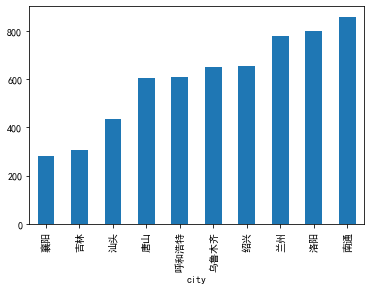

In [32]:
company_in_city = company_data["company_id"].groupby(company_data["city"]).count()
company_in_city.sort_values()[:10].plot.bar()

In [33]:
# 处理文本，将有logo的公司替换为1，没有的替换为0
company_data["company_logo"] = company_data["company_logo"].apply(lambda x: 1 if x else 0)
company_data

,company_id,company_full_name,company_short_name,company_logo,city,industry_field,company_features,finance_stage,company_size,interview_remark_num,position_num,update_time,process_rate,approve,company_combine_score,is_has_valid_position,other_label,match_score,modify_date
0,53,北京创锐文化传媒有限公司,聚美优品,1,北京,电商,聚集美丽，成人之美。,上市公司,2000人以上,147,15,2020-11-11,100,1,4.41723,1,"技能培训,节日礼物,季度奖金,岗位晋升,管理规范,帅哥多,五险一金,彩妆培训,股票期权,零食...",2.09427,2020-11-12 00:37:00
1,56,深圳市华宇讯科技有限公司,卖座网,1,深圳,"移动互联网,电商",构建中国最大的品质生活服务平台,B轮,500-2000人,165,29,2020-11-11,90,1,4.57778,1,"技能培训,股票期权,五险一金,弹性工作,带薪年假,绩效奖金,定期体检,专项奖金,各类社团组织",2.25038,2020-11-12 00:37:05
2,62,北京字节跳动科技有限公司,字节跳动,1,北京,文娱丨内容,你关心的，才是头条,C轮,2000人以上,189,10527,2020-11-11,9,1,4.43386,1,"扁平管理,弹性工作,大厨定制三餐,就近租房补贴,六险一金,股票期权,成长空间大,双线地铁沿线...",2.09427,2020-11-12 00:37:00
3,70,宝宝树（北京）信息技术有限公司,宝宝树,1,北京,社交,中国最大最受关注的育儿网站社区,上市公司,500-2000人,70,59,2020-11-10,19,1,4.46190,1,"商业医疗保险,股票期权,带薪年假,扁平管理,管理规范,美女多,帅哥多,定期体检,五险一金,午餐补助",2.09427,2020-11-12 00:37:00
4,77,深圳爱宝宝网络科技有限公司,爱宝宝,1,苏州,移动互联网,“爱宝宝”是一个真实的幼儿园社区,B轮,50-150人,0,0,2013-07-18,0,1,0.00000,0,"社会保险,享受带薪年假,定期集体户外活动以及每月员工生日会,参加员工持股计划,扁平管理,公司...",2.09956,2020-11-12 00:38:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49725,122188365,徐州酷威文化传媒有限公司,酷威文化传媒,0,徐州,None,None,未融资,15-50人,0,1,2020-11-11,0,1,0.00000,1,None,4.47436,2020-11-12 00:38:12
49726,122188971,兰州新区五和快捷酒店有限公司,五和快捷酒店,0,兰州,None,None,未融资,150-500人,0,3,2020-11-11,0,0,0.00000,1,None,4.66440,2020-11-12 00:37:38
49727,122189405,兰州鑫讯达网络信息科技有限公司,鑫讯达,0,兰州,None,None,未融资,少于15人,0,1,2020-11-11,0,0,0.00000,1,None,4.66440,2020-11-12 00:37:38
49728,122189545,吉林省鑫阳科技有限公司,鑫阳科技,0,吉林,None,None,未融资,50-150人,0,1,2020-11-11,0,0,0.00000,1,None,5.26761,2020-11-12 00:37:59


In [34]:
logo_data = company_data['company_logo'].value_counts()
logo_data.index = ("有Logo", "无Logo")

Text(0, 0.5, '公司数量')

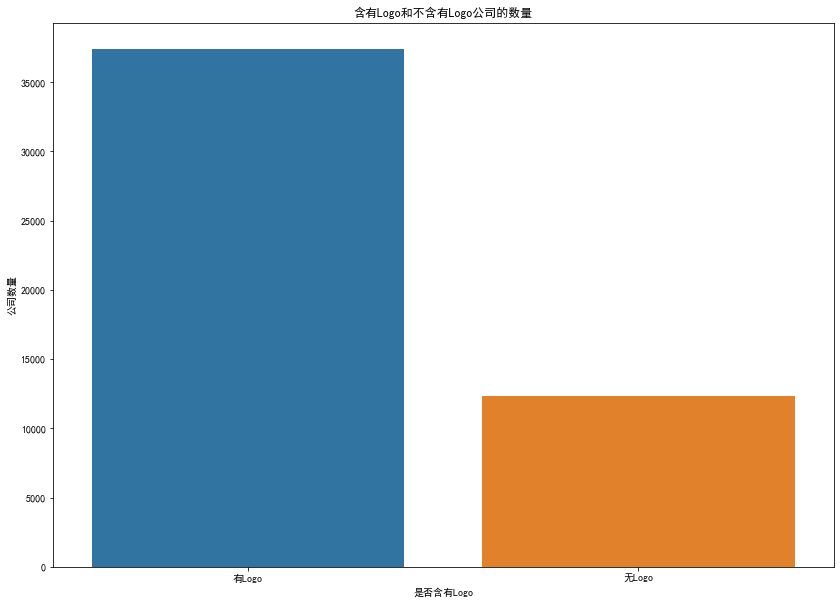

In [35]:
f, ax1 = plt.subplots(figsize = (14, 10))
sns.barplot(x=logo_data.index, y=logo_data.values)
ax1.set_title('含有Logo和不含有Logo公司的数量')
ax1.set_xlabel('是否含有Logo')
ax1.set_ylabel('公司数量')

Text(0, 0.5, '公司数量')

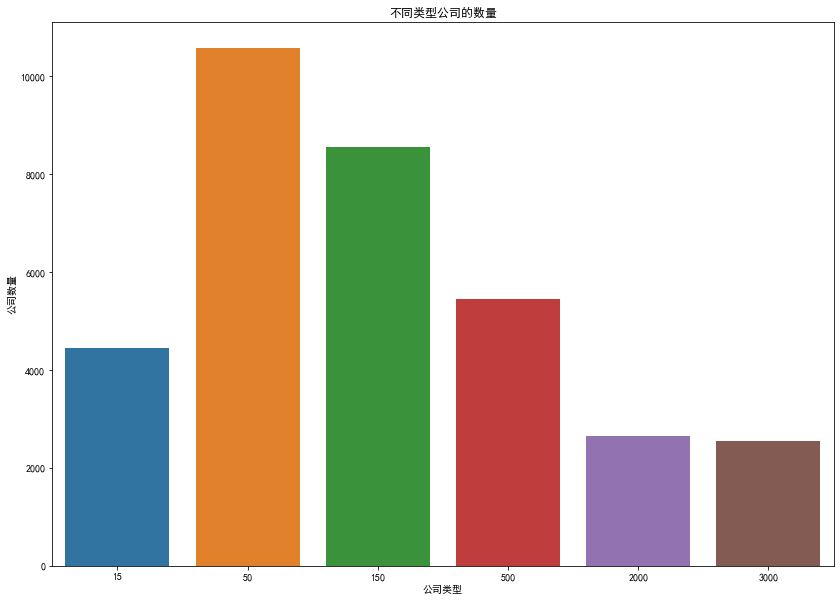

In [49]:
f, ax2 = plt.subplots(figsize = (14, 10))
company_size = company_data['company_size'].value_counts()
sns.barplot(x=company_size.index, y=company_size.values)
ax2.set_title('不同类型公司的数量')
ax2.set_xlabel('公司类型')
ax2.set_ylabel('公司数量')

In [37]:
company_data['company_size'].value_counts(sort=False)

150-500人      7100
50-150人      11782
少于15人         8573
2000人以上       3266
500-2000人     3361
15-50人       15648
Name: company_size, dtype: int64

In [38]:
def deal(x):
    if x == "2000人以上":
        return 3000
    elif x == "500-2000人":
        return 2000
    elif x == "150-500人":
        return 500
    elif x == "50-150人":
        return 150
    elif x == "15-50人":
        return 50
    elif x == "少于15人":
        return 15
company_data['company_size'] = company_data['company_size'].apply(deal)

Text(0, 0.5, '公司数量')

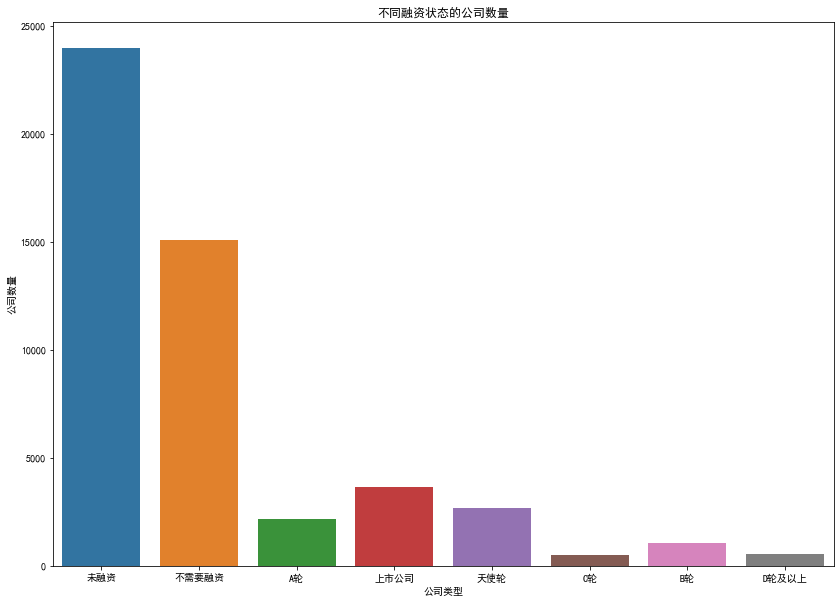

In [39]:
f, ax3 = plt.subplots(figsize = (14, 10))
company_finance = company_data['finance_stage'].value_counts(sort=False)
sns.barplot(x=company_finance.index, y=company_finance.values)
ax3.set_title('不同融资状态的公司数量')
ax3.set_xlabel('公司类型')
ax3.set_ylabel('公司数量')

In [40]:
update_time = company_data["company_id"].groupby(company_data["update_time"].dt.date).count().sort_values(ascending=False)
update_time.values.shape

(2379,)

Text(0, 0.5, '企业数目')

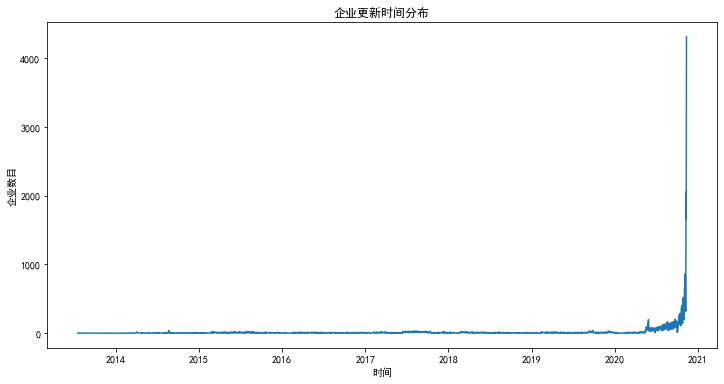

In [41]:
fig = plt.figure(figsize=(12,6))
update_time.plot()
plt.title("企业更新时间分布")
plt.xlabel("时间")
plt.ylabel("企业数目")

In [42]:
# 限定2020-01-01之前未更新企业
company_data = company_data[company_data["update_time"] >= pd.Timestamp('2020-01-01') ]

In [43]:
one_cities = ["北京", "上海", "广东", "深圳"]
two_cities = "成都、重庆、杭州、武汉、西安、天津、苏州、南京、郑州、长沙、东莞、沈阳、青岛、合肥、佛山".split("、")
other_cities = "福州、昆明、长春、哈尔滨、佛山、石家庄、南宁、常州、南昌、呼和浩特、温州、烟台、南通、珠海、贵阳、太原、乌鲁木齐、绍兴、中山、嘉兴、" \
           "唐山、徐州、金华、泉州、洛阳、兰州、海口、吉林、襄阳、汕头、潍坊".split("、")

def deal(x):
    if x in one_cities:
        return 1
    elif x in two_cities:
        return 2
    else:
        return 3
company_data["city"] = company_data["city"].apply(deal)

d:\code\python\statistics\venv\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [44]:
company_data

,company_id,company_full_name,company_short_name,company_logo,city,industry_field,company_features,finance_stage,company_size,interview_remark_num,position_num,update_time,process_rate,approve,company_combine_score,is_has_valid_position,other_label,match_score,modify_date
0,53,北京创锐文化传媒有限公司,聚美优品,1,1,电商,聚集美丽，成人之美。,上市公司,3000,147,15,2020-11-11,100,1,4.41723,1,"技能培训,节日礼物,季度奖金,岗位晋升,管理规范,帅哥多,五险一金,彩妆培训,股票期权,零食...",2.09427,2020-11-12 00:37:00
1,56,深圳市华宇讯科技有限公司,卖座网,1,1,"移动互联网,电商",构建中国最大的品质生活服务平台,B轮,2000,165,29,2020-11-11,90,1,4.57778,1,"技能培训,股票期权,五险一金,弹性工作,带薪年假,绩效奖金,定期体检,专项奖金,各类社团组织",2.25038,2020-11-12 00:37:05
2,62,北京字节跳动科技有限公司,字节跳动,1,1,文娱丨内容,你关心的，才是头条,C轮,3000,189,10527,2020-11-11,9,1,4.43386,1,"扁平管理,弹性工作,大厨定制三餐,就近租房补贴,六险一金,股票期权,成长空间大,双线地铁沿线...",2.09427,2020-11-12 00:37:00
3,70,宝宝树（北京）信息技术有限公司,宝宝树,1,1,社交,中国最大最受关注的育儿网站社区,上市公司,2000,70,59,2020-11-10,19,1,4.46190,1,"商业医疗保险,股票期权,带薪年假,扁平管理,管理规范,美女多,帅哥多,定期体检,五险一金,午餐补助",2.09427,2020-11-12 00:37:00
5,80,北京畅行信息技术有限公司,嘀嗒拼车,1,1,汽车丨出行,"中国最大C2C拼车平台, 10个月内完成三轮1.3亿美金融资, 高薪诚聘各类优秀人才加盟。",C轮,150,55,6,2020-11-11,77,1,4.11515,1,"五险一金,午餐补助,良好的晋升机制,愉悦的工作氛围,领导好,扁平管理,管理规范",2.09427,2020-11-12 00:37:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49725,122188365,徐州酷威文化传媒有限公司,酷威文化传媒,0,3,None,None,未融资,50,0,1,2020-11-11,0,1,0.00000,1,None,4.47436,2020-11-12 00:38:12
49726,122188971,兰州新区五和快捷酒店有限公司,五和快捷酒店,0,3,None,None,未融资,500,0,3,2020-11-11,0,0,0.00000,1,None,4.66440,2020-11-12 00:37:38
49727,122189405,兰州鑫讯达网络信息科技有限公司,鑫讯达,0,3,None,None,未融资,15,0,1,2020-11-11,0,0,0.00000,1,None,4.66440,2020-11-12 00:37:38
49728,122189545,吉林省鑫阳科技有限公司,鑫阳科技,0,3,None,None,未融资,150,0,1,2020-11-11,0,0,0.00000,1,None,5.26761,2020-11-12 00:37:59


In [45]:
company_data.drop("modify_date", axis=1, inplace=True)


d:\code\python\statistics\venv\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
company_data


,company_id,company_full_name,company_short_name,company_logo,city,industry_field,company_features,finance_stage,company_size,interview_remark_num,position_num,update_time,process_rate,approve,company_combine_score,is_has_valid_position,other_label,match_score
0,53,北京创锐文化传媒有限公司,聚美优品,1,1,电商,聚集美丽，成人之美。,上市公司,3000,147,15,2020-11-11,100,1,4.41723,1,"技能培训,节日礼物,季度奖金,岗位晋升,管理规范,帅哥多,五险一金,彩妆培训,股票期权,零食...",2.09427
1,56,深圳市华宇讯科技有限公司,卖座网,1,1,"移动互联网,电商",构建中国最大的品质生活服务平台,B轮,2000,165,29,2020-11-11,90,1,4.57778,1,"技能培训,股票期权,五险一金,弹性工作,带薪年假,绩效奖金,定期体检,专项奖金,各类社团组织",2.25038
2,62,北京字节跳动科技有限公司,字节跳动,1,1,文娱丨内容,你关心的，才是头条,C轮,3000,189,10527,2020-11-11,9,1,4.43386,1,"扁平管理,弹性工作,大厨定制三餐,就近租房补贴,六险一金,股票期权,成长空间大,双线地铁沿线...",2.09427
3,70,宝宝树（北京）信息技术有限公司,宝宝树,1,1,社交,中国最大最受关注的育儿网站社区,上市公司,2000,70,59,2020-11-10,19,1,4.46190,1,"商业医疗保险,股票期权,带薪年假,扁平管理,管理规范,美女多,帅哥多,定期体检,五险一金,午餐补助",2.09427
5,80,北京畅行信息技术有限公司,嘀嗒拼车,1,1,汽车丨出行,"中国最大C2C拼车平台, 10个月内完成三轮1.3亿美金融资, 高薪诚聘各类优秀人才加盟。",C轮,150,55,6,2020-11-11,77,1,4.11515,1,"五险一金,午餐补助,良好的晋升机制,愉悦的工作氛围,领导好,扁平管理,管理规范",2.09427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49725,122188365,徐州酷威文化传媒有限公司,酷威文化传媒,0,3,None,None,未融资,50,0,1,2020-11-11,0,1,0.00000,1,None,4.47436
49726,122188971,兰州新区五和快捷酒店有限公司,五和快捷酒店,0,3,None,None,未融资,500,0,3,2020-11-11,0,0,0.00000,1,None,4.66440
49727,122189405,兰州鑫讯达网络信息科技有限公司,鑫讯达,0,3,None,None,未融资,15,0,1,2020-11-11,0,0,0.00000,1,None,4.66440
49728,122189545,吉林省鑫阳科技有限公司,鑫阳科技,0,3,None,None,未融资,150,0,1,2020-11-11,0,0,0.00000,1,None,5.26761


In [47]:
def deal_word(word):
    if word is not None:
        generator_ = jieba.cut(word)
        return " ".join(generator_)
company_data["other_label_cut"] = company_data["other_label"].apply(deal_word)
stopwords = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '’', '!', '"', '#', '$', '¥', '%', '&', '\\', "'", '(',
             ')', '（', '）', '*', '+', ',', '-', '.', '/', ':', '：', ';', '<', '=', '>', '?', '@', '，', '。', '?', '★',
             '、', '…', '【', '】', '〖', '〗', '《', '》', '？', '“', '”', '‘', '’', '！', '[', '\\', '\\', ']', '^', '_',
             '`', '{', '|', '}', '~', '', '']
def del_stopwords(words):
    if words is not None:
        output = ''
        for word in words:
            if word not in stopwords:
                output += word
        return output

d:\code\python\statistics\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [53]:
company_data["other_label_cut"] = company_data["other_label_cut"].apply(lambda x: str(x))
company_data["other_label_cut"]

d:\code\python\statistics\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        技能 培训 , 节日 礼物 , 季度 奖金 , 岗位 晋升 , 管理 规范 , 帅哥 多 ,...
1        技能 培训 , 股票 期权 , 五险 一金 , 弹性 工作 , 带薪 年 假 , 绩效奖金 ...
2        扁平 管理 , 弹性 工作 , 大厨 定制 三餐 , 就近 租房 补贴 , 六险 一金 , ...
3        商业 医疗保险 , 股票 期权 , 带薪 年 假 , 扁平 管理 , 管理 规范 , 美女 ...
5        五险 一金 , 午餐 补助 , 良好 的 晋升 机制 , 愉悦 的 工作 氛围 , 领导 好...
                               ...                        
49725                                                 None
49726                                                 None
49727                                                 None
49728                                                 None
49729                                                 None
Name: other_label_cut, Length: 34209, dtype: object

In [54]:
company_data["other_label_cut"][0]

'技能 培训 , 节日 礼物 , 季度 奖金 , 岗位 晋升 , 管理 规范 , 帅哥 多 , 五险 一金 , 彩妆 培训 , 股票 期权 , 零食 鲜果 , 带薪 年 假 , 扁平 管理 , 美女 多 , 领导 好 , 午餐 补助 , 发展潜力'

In [55]:
company_data["other_label_cut"] = company_data["other_label_cut"].apply(lambda x: x if x is not None else "")
describe_document = " ".join(company_data["other_label_cut"])
tags = jieba.analyse.extract_tags(describe_document, topK=50, withWeight=True)

d:\code\python\statistics\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
for tag in tags:
    print(tag)

('None', 2.441496274708078)
('带薪', 0.48763400174025406)
('一金', 0.4139231538325194)
('五险', 0.39706945604425126)
('绩效奖金', 0.3774678727470264)
('双薪', 0.23780759912799965)
('补助', 0.23130321714431337)
('晋升', 0.21439339922298614)
('体检', 0.19350363508550922)
('岗位', 0.18373979644720226)
('扁平', 0.18088298344195664)
('节日', 0.17585864532510045)
('礼物', 0.16875467283049572)
('午餐', 0.16165719130814335)
('管理', 0.15933536368797066)
('定期', 0.1591199277830899)
('技能', 0.14793269170591436)
('期权', 0.14723694145604027)
('培训', 0.13600711953843284)
('弹性', 0.13335540558842474)
('旅游', 0.12486377617654831)
('年度', 0.11595331284857237)
('奖金', 0.11482252559408884)
('领导', 0.10958759845698618)
('年底', 0.10483554482427106)
('专项', 0.10441238579386795)
('美女', 0.0969160259193555)
('帅哥', 0.09334746241191579)
('年终', 0.08373681595674093)
('工作', 0.07956855033058667)
('津贴', 0.07913370652042585)
('股票', 0.07835557410625088)
('规范', 0.07416698716857427)
('分红', 0.07008459271800424)
('交通', 0.06413708364329646)
('通讯', 0.0609666191787

In [59]:
job_data.shape

(130444, 19)

In [60]:
job_data.columns


Index(['company_id', 'position_id', 'job_nature', 'finance_stage',
       'company_name', 'company_full_name', 'company_size', 'industry_field',
       'position_name', 'city', 'create_time', 'salary', 'work_year',
       'education', 'position_advantage', 'company_label_list', 'user_id',
       'company_logo', 'district'],
      dtype='object')

In [61]:
job_data

,company_id,position_id,job_nature,finance_stage,company_name,company_full_name,company_size,industry_field,position_name,city,create_time,salary,work_year,education,position_advantage,company_label_list,user_id,company_logo,district
0,53,1222794,全职,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,中级/高级DBA,成都,2020-11-13,16k-30k,3-5年,本科,周末双休、五险一金、午餐补贴、带薪休假,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
1,53,6206772,全职,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,PHP开发工程师,成都,2020-11-13,15k-25k,5-10年,本科,"五险一金,绩效奖金,餐饮补贴，带薪年假","技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
2,53,5943786,全职,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,IT工程师,成都,2020-11-13,5k-8k,1-3年,本科,"全额五险一金,餐饮补贴,周末双休，氛围轻松","技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
3,53,7782051,全职,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,IT技术支持,成都,2020-11-13,5k-7k,1-3年,本科,周末双休、五险一金、午餐补贴、带薪休假,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
4,53,7837367,全职,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,python开发工程师,北京,2020-11-13,25k-30k,3-5年,本科,团队实力强，互联网大厂背景；发展前景广,"技能培训,节日礼物,季度奖金,岗位晋升",11012233,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,东城区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130439,122184318,7945330,全职,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,15-50人,软件开发,软件高级开发工程师,青岛,2020-11-13,8k-15k,3-5年,本科,C#|.NET,,19760466,images/logo_default.png,市北区
130440,122184318,7945331,全职,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,15-50人,软件开发,软件高级开发工程师,青岛,2020-11-13,8k-15k,3-5年,本科,C#|.NET,,19760466,images/logo_default.png,市北区
130441,122184318,7945332,兼职,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,15-50人,软件开发,UI高级设计,青岛,2020-11-13,11k-12k,5-10年,大专,UI,,19760466,images/logo_default.png,市北区
130442,122185826,7946785,全职,未融资,晋江市铭钊通讯设备有限公司,晋江市铭钊通讯设备有限公司,50-150人,通讯电子,vivo手机销售顾问,泉州,2020-11-13,4k-8k,不限,不限,工作轻松，薪资稳定，能力越强薪资越高,,19762132,images/logo_default.png,晋江市


<AxesSubplot:>

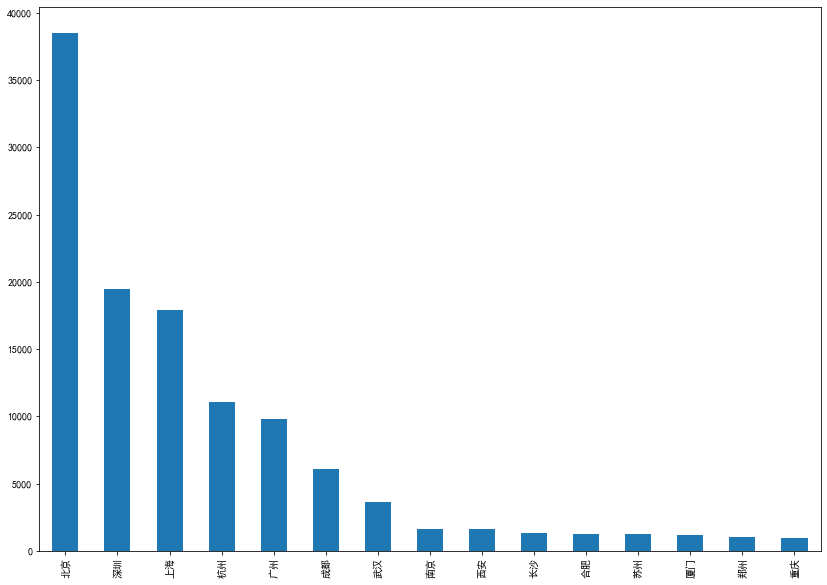

In [62]:
f, ax3 = plt.subplots(figsize = (14, 10))
job_data["city"].value_counts()[0:15].plot.bar()

<AxesSubplot:>

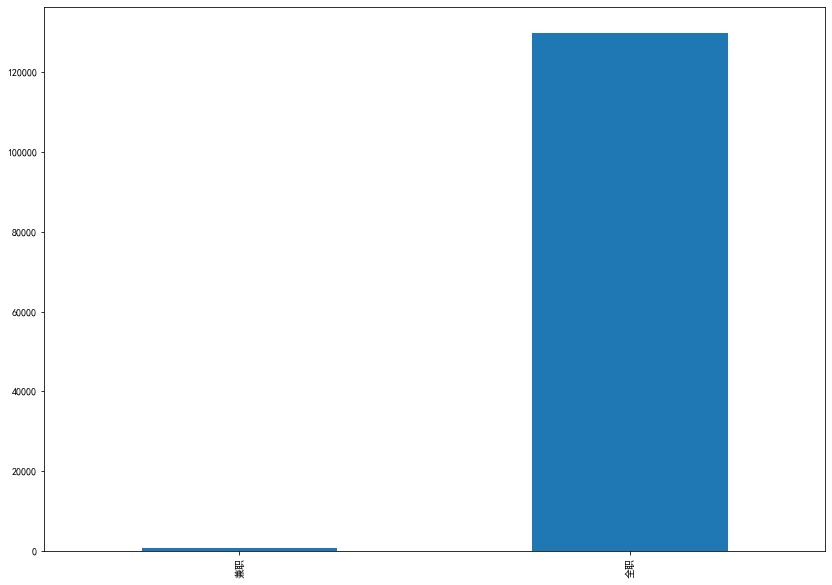

In [63]:
f, ax4 = plt.subplots(figsize = (14, 10))
job_data['job_nature'].value_counts(sort=False).plot.bar()

<AxesSubplot:xlabel='company_name'>

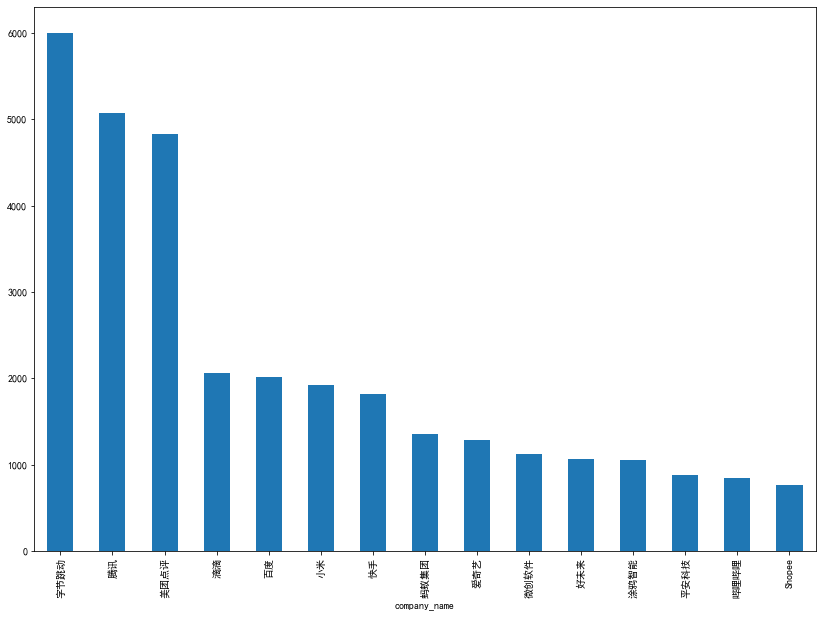

In [64]:
f, ax5 = plt.subplots(figsize = (14, 10))
job_data["company_id"].groupby(job_data["company_name"]).count().sort_values(ascending=False)[0:15].plot.bar()

<AxesSubplot:xlabel='company_name'>

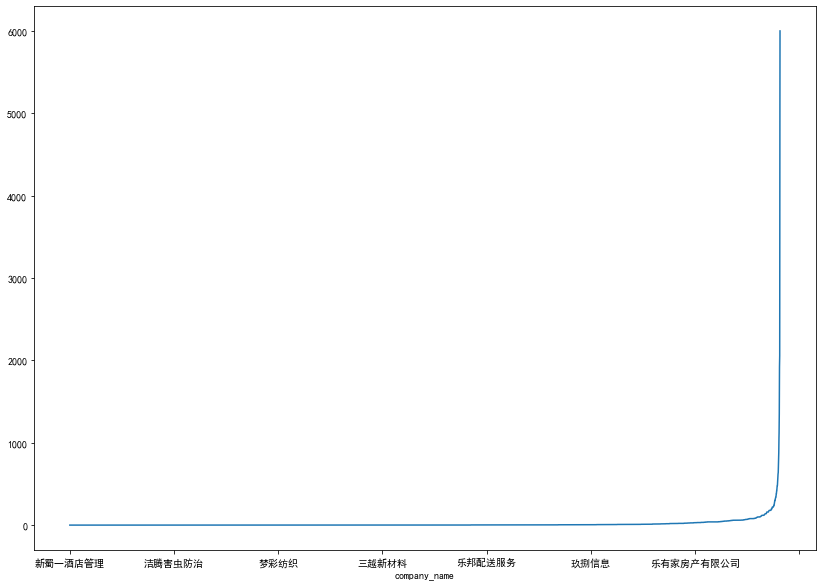

In [65]:
f, ax6 = plt.subplots(figsize = (14, 10))
job_data["company_id"].groupby(job_data["company_name"]).count().sort_values(ascending=True).plot()

In [66]:
job_data

,company_id,position_id,job_nature,finance_stage,company_name,company_full_name,company_size,industry_field,position_name,city,create_time,salary,work_year,education,position_advantage,company_label_list,user_id,company_logo,district
0,53,1222794,全职,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,中级/高级DBA,成都,2020-11-13,16k-30k,3-5年,本科,周末双休、五险一金、午餐补贴、带薪休假,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
1,53,6206772,全职,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,PHP开发工程师,成都,2020-11-13,15k-25k,5-10年,本科,"五险一金,绩效奖金,餐饮补贴，带薪年假","技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
2,53,5943786,全职,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,IT工程师,成都,2020-11-13,5k-8k,1-3年,本科,"全额五险一金,餐饮补贴,周末双休，氛围轻松","技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
3,53,7782051,全职,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,IT技术支持,成都,2020-11-13,5k-7k,1-3年,本科,周末双休、五险一金、午餐补贴、带薪休假,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
4,53,7837367,全职,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,python开发工程师,北京,2020-11-13,25k-30k,3-5年,本科,团队实力强，互联网大厂背景；发展前景广,"技能培训,节日礼物,季度奖金,岗位晋升",11012233,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,东城区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130439,122184318,7945330,全职,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,15-50人,软件开发,软件高级开发工程师,青岛,2020-11-13,8k-15k,3-5年,本科,C#|.NET,,19760466,images/logo_default.png,市北区
130440,122184318,7945331,全职,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,15-50人,软件开发,软件高级开发工程师,青岛,2020-11-13,8k-15k,3-5年,本科,C#|.NET,,19760466,images/logo_default.png,市北区
130441,122184318,7945332,兼职,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,15-50人,软件开发,UI高级设计,青岛,2020-11-13,11k-12k,5-10年,大专,UI,,19760466,images/logo_default.png,市北区
130442,122185826,7946785,全职,未融资,晋江市铭钊通讯设备有限公司,晋江市铭钊通讯设备有限公司,50-150人,通讯电子,vivo手机销售顾问,泉州,2020-11-13,4k-8k,不限,不限,工作轻松，薪资稳定，能力越强薪资越高,,19762132,images/logo_default.png,晋江市


In [67]:
job_data_position = job_data["position_name"].groupby(job_data["company_name"]).apply(" ".join)
describe_sum = job_data.groupby("company_name")['position_name'].sum()
print(describe_sum)

company_name
1066银行直贷                                      销售顾问客户经理销售经理销售经理
18直播                                                  主播运营主播运营
2020公职教育                                            公职老师-言语和常识
2144游戏       游戏文案策划3D游戏特效师Flash页游开发高级运维工程师 (MJ000175)3D动作师资...
21世纪教育                                        课程顾问招生老师课程顾问招生老师
                                   ...                        
龙竹网络         销售专员线下合伙人bd商务拓展产品经理销售专员销售代表销售专员线下合伙人bd商务拓展产品经理...
龙腾出行         品类运营（机场场景）商务BD主管品类运营产品经理（业务管理系统）中台产品经理平台产品经理西北...
龙鑫重工                                                  销售专员销售专员
龙门古街商业管理                                                 市场部主管
：锐仕方达人力资源                                            互联网保险产品经理
Name: position_name, Length: 6816, dtype: object


In [68]:
count_vec = CountVectorizer(min_df=5, max_df=5000, max_features=100, stop_words=stopwords)
sparse_result_count = count_vec.fit_transform(describe_sum)
# 在稀疏矩阵的输出中，左边的括号中的第1个数字是文本的序号i，第2个数字是词的序号j，第3个数字就是的词频
# 输出稀疏矩阵
print(sparse_result_count.shape)
# 输出关键词
print('\nvocabulary list:\n\n',count_vec.get_feature_names())
# 输出关键词编号
print('\nvocabulary dic:\n\n',count_vec.vocabulary_)

(6816, 100)

vocabulary list:

 ['ai', 'amp', 'android', 'android开发工程师', 'go', 'hrbp', 'ios', 'ios开发工程师', 'java', 'java工程师', 'java开发', 'java开发工程师', 'java开发工程师java开发工程师', 'java高级开发工程师', 'leader', 'net开发工程师', 'php', 'python', 'react', 'to', 'web前端开发工程师', '上海', '专家', '中级', '主管', '二次元', '五险一金', '产品专家', '产品经理', '产品经理产品经理', '产品运营', '六险一金', '内容运营', '初级', '前端开发工程师', '前端开发工程师前端开发工程师', '北京', '华东', '南京', '双休', '后台开发工程师', '商业化', '在线教育', '外包', '大客户销售', '大数据', '大数据开发工程师', '实习', '实习生', '客户经理', '工程师', '广州', '开发工程师', '开发工程师c', '成都', '技术专家', '抖音', '招聘专员', '数据产品经理', '数据分析师', '新媒体运营', '杭州', '架构师', '武汉', '测试工程师', '测试开发工程师', '海外', '深圳', '游戏', '用户增长', '用户运营', '电商', '直播', '研发工程师', '社招', '算法工程师', '经理', '英语', '西安', '课程顾问', '资深', '资深java开发工程师', '资深产品经理', '软件测试工程师', '运维开发工程师', '销售专员', '销售专员销售专员', '销售经理', '销售顾问', '销售顾问销售顾问', '长沙', '项目经理', '高级', '高级java工程师', '高级java开发工程师', '高级产品经理', '高级前端开发工程师', '高级开发工程师', '高级测试工程师', '高级测试开发工程师']

vocabulary dic:

 {'二次元': 25, 'php': 16, '资深': 80, '高级产品经理': 95, 'python': 17, '产品专家'

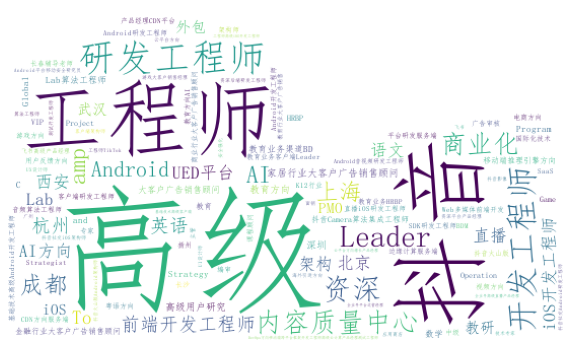

In [69]:
fig = plt.figure(figsize=(10,10))
word_cloud = WordCloud(background_color="white", mask=imread("./字节跳动.jpg"), stopwords=stopwords,
                       font_path=r'C:\Windows\Fonts\simfang.ttf', collocations = False,  random_state = 30)
word_cloud.generate(describe_sum["字节跳动"])
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [70]:
pattern = r"\d+k-\d+k"
outlier = job_data["salary"][job_data['salary'].astype(str).str.match(pattern, case=False) == True]


[57642, 80585, 94562, 103996, 110063, 114179, 117419, 120057, 122127]

0.9362695492180313


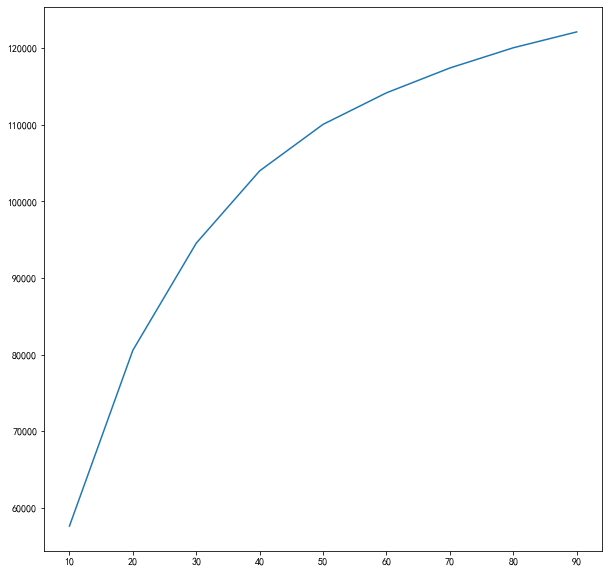

In [71]:
fig = plt.figure(figsize=(10,10))
job_num = []
print()
for i in range(10, 100, 10):
    job_num.append(outlier.value_counts()[0:i].sum())
print(job_num)
print()
pd.Series(dict(zip(range(10, 100, 10), job_num))).plot()
print(job_num[-1]/outlier.value_counts().sum())

20k-40k    10998
15k-30k     9268
15k-25k     8079
10k-20k     6217
10k-15k     5339
           ...  
10k-13k      204
30k-55k      203
12k-22k      200
15k-28k      193
16k-30k      187
Name: salary, Length: 90, dtype: int64


<AxesSubplot:>

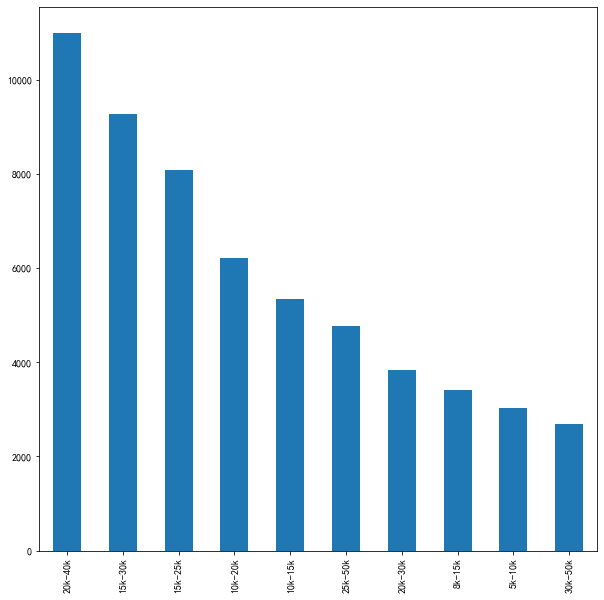

In [72]:
fig = plt.figure(figsize=(10,10))
print(outlier.value_counts()[0:90])
outlier.value_counts()[0:10].plot.bar()

In [73]:
job_data.shape

(130444, 19)

In [74]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130444 entries, 0 to 130443
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   company_id          130444 non-null  int64 
 1   position_id         130444 non-null  int64 
 2   job_nature          130444 non-null  object
 3   finance_stage       130444 non-null  object
 4   company_name        130444 non-null  object
 5   company_full_name   130444 non-null  object
 6   company_size        130444 non-null  object
 7   industry_field      130444 non-null  object
 8   position_name       130444 non-null  object
 9   city                130444 non-null  object
 10  create_time         130444 non-null  object
 11  salary              130444 non-null  object
 12  work_year           130444 non-null  object
 13  education           130444 non-null  object
 14  position_advantage  130444 non-null  object
 15  company_label_list  130444 non-null  object
 16  us

In [75]:
job_data['job_nature'] = job_data['job_nature'].apply(lambda x: 1 if x == "全职" else 0)
job_data

,company_id,position_id,job_nature,finance_stage,company_name,company_full_name,company_size,industry_field,position_name,city,create_time,salary,work_year,education,position_advantage,company_label_list,user_id,company_logo,district
0,53,1222794,1,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,中级/高级DBA,成都,2020-11-13,16k-30k,3-5年,本科,周末双休、五险一金、午餐补贴、带薪休假,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
1,53,6206772,1,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,PHP开发工程师,成都,2020-11-13,15k-25k,5-10年,本科,"五险一金,绩效奖金,餐饮补贴，带薪年假","技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
2,53,5943786,1,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,IT工程师,成都,2020-11-13,5k-8k,1-3年,本科,"全额五险一金,餐饮补贴,周末双休，氛围轻松","技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
3,53,7782051,1,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,IT技术支持,成都,2020-11-13,5k-7k,1-3年,本科,周末双休、五险一金、午餐补贴、带薪休假,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
4,53,7837367,1,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,python开发工程师,北京,2020-11-13,25k-30k,3-5年,本科,团队实力强，互联网大厂背景；发展前景广,"技能培训,节日礼物,季度奖金,岗位晋升",11012233,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,东城区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130439,122184318,7945330,1,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,15-50人,软件开发,软件高级开发工程师,青岛,2020-11-13,8k-15k,3-5年,本科,C#|.NET,,19760466,images/logo_default.png,市北区
130440,122184318,7945331,1,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,15-50人,软件开发,软件高级开发工程师,青岛,2020-11-13,8k-15k,3-5年,本科,C#|.NET,,19760466,images/logo_default.png,市北区
130441,122184318,7945332,0,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,15-50人,软件开发,UI高级设计,青岛,2020-11-13,11k-12k,5-10年,大专,UI,,19760466,images/logo_default.png,市北区
130442,122185826,7946785,1,未融资,晋江市铭钊通讯设备有限公司,晋江市铭钊通讯设备有限公司,50-150人,通讯电子,vivo手机销售顾问,泉州,2020-11-13,4k-8k,不限,不限,工作轻松，薪资稳定，能力越强薪资越高,,19762132,images/logo_default.png,晋江市


In [76]:
one_cities = ["北京", "上海", "广东", "深圳"]
two_cities = "成都、重庆、杭州、武汉、西安、天津、苏州、南京、郑州、长沙、东莞、沈阳、青岛、合肥、佛山".split("、")
other_cities = "福州、昆明、长春、哈尔滨、佛山、石家庄、南宁、常州、南昌、呼和浩特、温州、烟台、南通、珠海、贵阳、太原、乌鲁木齐、绍兴、中山、嘉兴、" \
           "唐山、徐州、金华、泉州、洛阳、兰州、海口、吉林、襄阳、汕头、潍坊".split("、")

def deal1(x):
    if x in one_cities:
        return 1
    elif x in two_cities:
        return 2
    else:
        return 3
job_data["city"] = job_data["city"].apply(deal1)
job_data

,company_id,position_id,job_nature,finance_stage,company_name,company_full_name,company_size,industry_field,position_name,city,create_time,salary,work_year,education,position_advantage,company_label_list,user_id,company_logo,district
0,53,1222794,1,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,中级/高级DBA,2,2020-11-13,16k-30k,3-5年,本科,周末双休、五险一金、午餐补贴、带薪休假,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
1,53,6206772,1,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,PHP开发工程师,2,2020-11-13,15k-25k,5-10年,本科,"五险一金,绩效奖金,餐饮补贴，带薪年假","技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
2,53,5943786,1,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,IT工程师,2,2020-11-13,5k-8k,1-3年,本科,"全额五险一金,餐饮补贴,周末双休，氛围轻松","技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
3,53,7782051,1,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,IT技术支持,2,2020-11-13,5k-7k,1-3年,本科,周末双休、五险一金、午餐补贴、带薪休假,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
4,53,7837367,1,上市公司,聚美优品,北京创锐文化传媒有限公司,2000人以上,电商,python开发工程师,1,2020-11-13,25k-30k,3-5年,本科,团队实力强，互联网大厂背景；发展前景广,"技能培训,节日礼物,季度奖金,岗位晋升",11012233,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,东城区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130439,122184318,7945330,1,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,15-50人,软件开发,软件高级开发工程师,2,2020-11-13,8k-15k,3-5年,本科,C#|.NET,,19760466,images/logo_default.png,市北区
130440,122184318,7945331,1,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,15-50人,软件开发,软件高级开发工程师,2,2020-11-13,8k-15k,3-5年,本科,C#|.NET,,19760466,images/logo_default.png,市北区
130441,122184318,7945332,0,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,15-50人,软件开发,UI高级设计,2,2020-11-13,11k-12k,5-10年,大专,UI,,19760466,images/logo_default.png,市北区
130442,122185826,7946785,1,未融资,晋江市铭钊通讯设备有限公司,晋江市铭钊通讯设备有限公司,50-150人,通讯电子,vivo手机销售顾问,3,2020-11-13,4k-8k,不限,不限,工作轻松，薪资稳定，能力越强薪资越高,,19762132,images/logo_default.png,晋江市


In [77]:
job_data["company_size"].value_counts()

2000人以上      58228
500-2000人    25941
150-500人     21797
50-150人      14794
15-50人        7922
少于15人         1762
Name: company_size, dtype: int64

In [78]:
def deal(x):
    if x == "2000人以上":
        return 3000
    elif x == "500-2000人":
        return 2000
    elif x == "150-500人":
        return 500
    elif x == "50-150人":
        return 150
    elif x == "15-50人":
        return 50
    elif x == "少于15人":
        return 15
job_data["company_size"] = job_data["company_size"].apply(deal)

In [79]:
job_data['industry_field'].value_counts()

文娱丨内容       12666
移动互联网        9092
金融           7714
消费生活         6903
社交           6322
            ...  
其他,房产家居         1
软件开发、教育         1
文娱丨内容、教育        1
医疗丨健康、社交        1
消费生活、工具         1
Name: industry_field, Length: 620, dtype: int64

In [80]:
job_data[["industry_field", "salary"]].to_csv("./data.csv")


In [81]:
job_data

,company_id,position_id,job_nature,finance_stage,company_name,company_full_name,company_size,industry_field,position_name,city,create_time,salary,work_year,education,position_advantage,company_label_list,user_id,company_logo,district
0,53,1222794,1,上市公司,聚美优品,北京创锐文化传媒有限公司,3000,电商,中级/高级DBA,2,2020-11-13,16k-30k,3-5年,本科,周末双休、五险一金、午餐补贴、带薪休假,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
1,53,6206772,1,上市公司,聚美优品,北京创锐文化传媒有限公司,3000,电商,PHP开发工程师,2,2020-11-13,15k-25k,5-10年,本科,"五险一金,绩效奖金,餐饮补贴，带薪年假","技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
2,53,5943786,1,上市公司,聚美优品,北京创锐文化传媒有限公司,3000,电商,IT工程师,2,2020-11-13,5k-8k,1-3年,本科,"全额五险一金,餐饮补贴,周末双休，氛围轻松","技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
3,53,7782051,1,上市公司,聚美优品,北京创锐文化传媒有限公司,3000,电商,IT技术支持,2,2020-11-13,5k-7k,1-3年,本科,周末双休、五险一金、午餐补贴、带薪休假,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区
4,53,7837367,1,上市公司,聚美优品,北京创锐文化传媒有限公司,3000,电商,python开发工程师,1,2020-11-13,25k-30k,3-5年,本科,团队实力强，互联网大厂背景；发展前景广,"技能培训,节日礼物,季度奖金,岗位晋升",11012233,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,东城区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130439,122184318,7945330,1,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,50,软件开发,软件高级开发工程师,2,2020-11-13,8k-15k,3-5年,本科,C#|.NET,,19760466,images/logo_default.png,市北区
130440,122184318,7945331,1,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,50,软件开发,软件高级开发工程师,2,2020-11-13,8k-15k,3-5年,本科,C#|.NET,,19760466,images/logo_default.png,市北区
130441,122184318,7945332,0,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,50,软件开发,UI高级设计,2,2020-11-13,11k-12k,5-10年,大专,UI,,19760466,images/logo_default.png,市北区
130442,122185826,7946785,1,未融资,晋江市铭钊通讯设备有限公司,晋江市铭钊通讯设备有限公司,150,通讯电子,vivo手机销售顾问,3,2020-11-13,4k-8k,不限,不限,工作轻松，薪资稳定，能力越强薪资越高,,19762132,images/logo_default.png,晋江市


In [82]:
job_data['create_time'].value_counts()

2020-11-13    130444
Name: create_time, dtype: int64

In [83]:
a = job_data["position_name"].value_counts()

In [84]:
a[100:150]

行政前台            89
高级java工程师       89
人事行政专员          86
市场经理            86
实施工程师           86
前端开发            85
置业顾问            85
信息流优化师          84
推荐算法工程师         82
iOS开发工程师        82
客服              81
架构师             81
高级招聘专员          80
招聘主管            80
市场推广            77
测试开发专家          76
短视频运营           76
产品运营经理          76
客服主管            75
产品经理/高级产品经理     75
高级视觉设计师         74
社群运营专员          74
房产销售            73
web前端           72
销售总监            72
运营助理            72
资深java开发工程师     72
中级java开发工程师     71
广告优化师           70
需求分析师           70
服务端开发工程师        70
电话销售专员          69
会计              69
c1货运司机          68
新媒体运营专员         68
.net开发工程师       67
爬虫工程师           66
IOS开发工程师        66
bd经理            66
java架构师         65
储备干部            64
后台开发工程师         64
房产销售置业顾问        64
中高级java开发工程师    64
课程顾问招生老师        64
游戏策划            64
法务专员            64
销售主管            64
数据运营            62
人力资源专员          62
Name: position_name, dtype: int64

# 手动对数据进行分类
* 互联网类
    含有关键词 前端|后端|开发|Java|Python|java|python|C|C|产品经理|游戏|数据|大数据|测试|算法|UI|ui|web|产品|爬虫|bd|优化
* 传统行业类
    含有关键词 工人|招聘|人力|司机
* 文化行业类
    视频|直播|主播|卖货|
* 服务行业内
    客服|推广|美发师|销售|新媒体|hr|HR|运营|市场|经纪人|售前|人事|顾问
* 其他类

In [85]:
job_data["position_name_type"] = 5

In [86]:
# df.loc[df['A'] > 2, 'B'] = new_val
internet_list = "前端|后端|开发|Java|Python|java|python|C|C|go|产品经理|游戏|数据|大数据|测试|算法|UI|ui|web|产品|爬虫|bd|IT|NET"
culture_list = "视频|直播|主播|卖货|老师|美术|美工"
traditional_list = "工人|招聘|人力|司机|hr|HR|运营|市场|经纪人|售前|人事|操作|助理|外卖"
service_list = "客服|推广|美发师|销售|新媒体|顾问|网管"
job_data.loc[job_data["position_name"].str.contains(internet_list, case=False), "position_name_type"] = 1
job_data.loc[job_data["position_name"].str.contains(culture_list, case=False), "position_name_type"] = 2
job_data.loc[job_data["position_name"].str.contains(traditional_list, case=False), "position_name_type"] = 3
job_data.loc[job_data["position_name"].str.contains(service_list, case=False), "position_name_type"] = 4
# job_data.loc[job_data["position_name"].str.contains(other_list, case=False), "position_name_type"] = 5

In [87]:
job_data["position_name_type"].value_counts()

1    53824
5    35993
3    21264
4    14594
2     4769
Name: position_name_type, dtype: int64

In [88]:
job_data[job_data["position_name_type"] == 5]

,company_id,position_id,job_nature,finance_stage,company_name,company_full_name,company_size,industry_field,position_name,city,create_time,salary,work_year,education,position_advantage,company_label_list,user_id,company_logo,district,position_name_type
0,53,1222794,1,上市公司,聚美优品,北京创锐文化传媒有限公司,3000,电商,中级/高级DBA,2,2020-11-13,16k-30k,3-5年,本科,周末双休、五险一金、午餐补贴、带薪休假,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,i/image2/M01/15/7E/CgotOVysFsOAVFZkAAA2j1a2TKM...,高新区,5
24,56,7501849,1,B轮,卖座网,深圳市华宇讯科技有限公司,2000,"移动互联网,电商",城市总经理,1,2020-11-13,20k-40k,5-10年,本科,团队稳定切业务扩张性强,"技能培训,股票期权,五险一金,弹性工作",3234585,i/image2/M01/76/3E/CgotOVtljaSAFEmjAACSJeCXFWE...,南山区,5
25,56,7554665,1,B轮,卖座网,深圳市华宇讯科技有限公司,2000,"移动互联网,电商",采购专员（苏打优选APP）,1,2020-11-13,6k-8k,1-3年,大专,腾讯系背景、千万级用户APP,"技能培训,股票期权,五险一金,弹性工作",3234585,i/image2/M01/76/3E/CgotOVtljaSAFEmjAACSJeCXFWE...,南山区,5
27,56,7638517,1,B轮,卖座网,深圳市华宇讯科技有限公司,2000,"移动互联网,电商",流程经理,1,2020-11-13,12k-18k,3-5年,大专,2B福利行业头部企业，B2B2C，互联网+,"技能培训,股票期权,五险一金,弹性工作",3234585,i/image2/M01/76/3E/CgotOVtljaSAFEmjAACSJeCXFWE...,南山区,5
29,56,7812895,1,B轮,卖座网,深圳市华宇讯科技有限公司,2000,"移动互联网,电商",培训与企业文化主管/经理,1,2020-11-13,10k-15k,5-10年,本科,腾讯系背景 toB福利行业头部企业 多元化业务,"技能培训,股票期权,五险一金,弹性工作",3234585,i/image2/M01/76/3E/CgotOVtljaSAFEmjAACSJeCXFWE...,南山区,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130403,122172404,7936858,1,未融资,柒玖堂生物,云南柒玖堂生物科技有限公司,50,其他,跟车员,3,2020-11-13,7k-9k,不限,不限,工作轻松简单,,19748146,images/logo_default.png,文山市,5
130405,122172897,7937208,1,未融资,龙旺人力资源,东莞市龙旺人力资源有限公司,15,企业服务,生产普工,2,2020-11-13,5k-6k,不限,不限,包吃住 简单易做 普通工衣 坐班,,19748614,images/logo_default.png,东莞市,5
130412,122174533,7942770,1,未融资,茵讯智能科技,南京茵讯智能科技有限公司,15,"数据服务,软件开发",售后工程师,2,2020-11-13,3k-6k,不限,大专,风口行业；潜力公司；工作氛围轻松；周末双休；,"带薪年假,五险一金,周末双休",19749502,i/image/M00/6A/71/CgqCHl-o-aiAFcuIAAFQkxcEHK89...,建邺区,5
130420,122176470,7939964,1,未融资,城专品一房地产,武汉城专品一房地产经纪有限公司,50,房产家居,管培生/储备干部,2,2020-11-13,5k-10k,不限,大专,加入我们你会有不一样的收获,,19752037,images/logo_default.png,武昌区,5


In [89]:
job_data['company_logo'] = job_data['company_logo'].apply(lambda x: 1 if x is not None else 0)

In [90]:
def deal(x: str, pattern: str, i: int):
  result = re.search(pattern, str(x))
  return result.groups()[i] if result is not None else 0

job_data['salary_min'] = job_data['salary'].apply(deal, pattern=r"(\d+)k-(\d+)k", i=0)
job_data['salary_max'] = job_data['salary'].apply(deal, pattern=r"(\d+)k-(\d+)k", i=1)

In [91]:
job_data["salary_min"] = job_data["salary_min"].astype(int)
job_data["salary_max"] = job_data["salary_max"].apply(int)
job_data["salary_mid"] = (job_data["salary_min"] + job_data["salary_max"]) / 2

In [92]:
job_data['industry_field'].value_counts()[0:40].sum() / job_data['industry_field'].value_counts().sum()

0.8625923768053724

In [93]:
job_data['work_year'].value_counts()


3-5年     48675
1-3年     30046
不限       27100
5-10年    21465
1年以下      2102
10年以上     1056
Name: work_year, dtype: int64

In [94]:
# 占了总共的90%的职位，将剩余的公司领域归类为其他
def deal(x, ls: list):
    if x not in ls:
        return "其他"
    else:
        return x

job_data['industry_field'] = job_data['industry_field'].apply(deal, ls = job_data['industry_field'].value_counts()[0:40].index)



In [95]:
def deal(x: str, pattern: str, i: int):
  result = re.search(pattern, str(x))
  return result.groups()[i] if result is not None else x if x != "不限" else "0"


In [96]:
job_data['work_year_min'] = job_data['work_year'].apply(deal, pattern=r"(\d)\-(\d)+年", i=0)
job_data["work_year_max"] = job_data['work_year'].apply(deal, pattern=r"(\d)\-(\d)+年", i=1)

In [97]:
job_data

,company_id,position_id,job_nature,finance_stage,company_name,company_full_name,company_size,industry_field,position_name,city,...,company_label_list,user_id,company_logo,district,position_name_type,salary_min,salary_max,salary_mid,work_year_min,work_year_max
0,53,1222794,1,上市公司,聚美优品,北京创锐文化传媒有限公司,3000,电商,中级/高级DBA,2,...,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,1,高新区,5,16,30,23.0,3,5
1,53,6206772,1,上市公司,聚美优品,北京创锐文化传媒有限公司,3000,电商,PHP开发工程师,2,...,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,1,高新区,1,15,25,20.0,5,0
2,53,5943786,1,上市公司,聚美优品,北京创锐文化传媒有限公司,3000,电商,IT工程师,2,...,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,1,高新区,1,5,8,6.5,1,3
3,53,7782051,1,上市公司,聚美优品,北京创锐文化传媒有限公司,3000,电商,IT技术支持,2,...,"技能培训,节日礼物,季度奖金,岗位晋升",2231747,1,高新区,1,5,7,6.0,1,3
4,53,7837367,1,上市公司,聚美优品,北京创锐文化传媒有限公司,3000,电商,python开发工程师,1,...,"技能培训,节日礼物,季度奖金,岗位晋升",11012233,1,东城区,1,25,30,27.5,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130439,122184318,7945330,1,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,50,其他,软件高级开发工程师,2,...,,19760466,1,市北区,1,8,15,11.5,3,5
130440,122184318,7945331,1,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,50,其他,软件高级开发工程师,2,...,,19760466,1,市北区,1,8,15,11.5,3,5
130441,122184318,7945332,0,不需要融资,51JOB-济南警友软件有限公司,51JOB-济南警友软件有限公司,50,其他,UI高级设计,2,...,,19760466,1,市北区,1,11,12,11.5,5,0
130442,122185826,7946785,1,未融资,晋江市铭钊通讯设备有限公司,晋江市铭钊通讯设备有限公司,150,通讯电子,vivo手机销售顾问,3,...,,19762132,1,晋江市,4,4,8,6.0,0,0


In [98]:
job_data['work_year_min'].replace("1年以下", "0", inplace=True)
job_data['work_year_max'].replace("1年以下", "1", inplace=True)
job_data['work_year_min'].replace("10年以上", "10", inplace=True)
job_data['work_year_max'].replace("10年以上", "100", inplace=True)


In [99]:
job_data["work_year_min"]=job_data["work_year_min"].astype(int)
job_data["work_year_max"] = job_data["work_year_max"].astype(int)


In [100]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130444 entries, 0 to 130443
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   company_id          130444 non-null  int64  
 1   position_id         130444 non-null  int64  
 2   job_nature          130444 non-null  int64  
 3   finance_stage       130444 non-null  object 
 4   company_name        130444 non-null  object 
 5   company_full_name   130444 non-null  object 
 6   company_size        130444 non-null  int64  
 7   industry_field      130444 non-null  object 
 8   position_name       130444 non-null  object 
 9   city                130444 non-null  int64  
 10  create_time         130444 non-null  object 
 11  salary              130444 non-null  object 
 12  work_year           130444 non-null  object 
 13  education           130444 non-null  object 
 14  position_advantage  130444 non-null  object 
 15  company_label_list  130444 non-nul

## 数据处理
* company_id, company_name, company_full_name 表示的是同一个概念, 即表示当前公司, 因此去除这其中的company_name, company_full_name
* 其次是position_id 列, 该列用于标记数据中的职位数据, 没有明显价值

需要的列|名称|类型
----|--|--
company_id|公司对应的id号|离散变量
job_nature|职位对应的状况（兼职/全职）|离散变量
company_size|公司的大小|离散变量
industry_field|公司的经营领域|离散变量
**position_name_type**|职位名称|离散变量
city|工作所在城市|分类变量
create_time|创建时间|连续变量
education|受教育程度|离散变量
company_logo|公司是否有logo|离散变量
work_year_min|工作最低要求年限|离散变量
work_year_max|工作最高要求年限|离散变量
**salary_mid**|工作月薪均值|连续变量
salary_min|工作最小月薪|连续变量
salary_max|工作最大月薪|连续变量
work_year_max|工作最高要求年限|离散变量

In [101]:
# 导出为一个新表
job_data[["company_size", "job_nature", "company_id", "industry_field", "position_name_type", "city",
                     "education", "company_logo", "work_year_max", "work_year_min", "salary_max", "salary_mid",
                     "salary_min"]].to_csv("./dealed_data.csv")